<a href="https://colab.research.google.com/github/mariron42/FisicaComputacional-1/blob/main/Actividad%204/%20Act4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 1


---


### **INICIO**

**Infomación de datos**



---


Los datos analizados pertenecen a una estación meteorologica en Mexicali, Baja California. Concretamente la estación 2033 que tiene datos registrados hasta el 2012 entre los que se encuentra, precipitación, evaporación, temperatura maxima y minima.


Los siguientes analizis se realizaron siguiendo el ejemplo del profesor pero fueron adaptados a nuestra ciudad y cituación.

# **Análisis Exploratorio de Datos**


---

(EDA: Exploratory Data Analysis)



Iniciaremos una colección de funciones para realizar los que se llama Análisis Exploratorio de Datos.

El EDA, como su nombre lo indica, nos concentramos en investigar todo lo relacionado con la forma y contenido del DatFrame.

Entre algunas las características en las nos centramos por ejemplo son:

Estructuras/patrones en los datos
Número de datos faltantes
Detección de datos anómalos y valores extremos
Extraer y seleccionar variables importantes
Probar alguna teoría de comportamiento de los datos
Aplicamos una serie de funciones al DatFrame para caracterizarlo. Ya hemos utilizado algunas de ellas en la Actividad anterior, y agregaremos un conjunto adicional de ellas.

Descripción general de un DataFrame

Lista de funciones a aplicar:

df.shape : Forma y dimensiones de df.
df.types : Tipo de datos de las columnas (numéricas o categóricas)
df.head(), df.tail(), df.sample(5) : Despliege de un número de renglones, para ver la estructura de df, nombres de columnas o si los datos tienen sentido a lo esperado.
df.info() : Proporciona información general de la estructura y componentes de df
df.describe() : Descripción estadística de las variables numéricas.
df.describe(include='object') : Descripción estadística de las variables categóricas.
df.isnull().sum() : Suma de valores faltantes.
Actividad 1. Por favor, sintetiza las características del conjunto de datos que estas analizando.

In [ ]:
#############################################################################################################################
# Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline



# Tomar la dirección URL del archivo en formato 'raw'
#Hacer una variable url para luego no tenener que escribir las la url abajo
url = 'https://raw.githubusercontent.com/mariron42/Los-trabajos-de-marcel/main/act3/2033.txt'






#variable que da nombre a las colunas 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin'] #Nombres de las columnas

df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
# El separador de datos es de uno o más espacios, sep='\s+'
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 


######################################################################################################
# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()#Esta es la función para respaldar el data frame


#######################################################################################################
# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = "Nulo" 
#creamos la variable "str_Nulo"

df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Aquí es donde reamente se remplasa la variable
#######################################################################################################

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin'] #Lista de columnas (se usará en el for)

#el for es una ciclo donde ejecutaremos nuestra función de conversión de cariables
for cols in cols_list:
  #Funcaión de conversión de variables
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce') #to_numeric es la función 
  #(base de datos(lista de colunas), como llamar a los errores )
  #ese cols va a irse recorriendo en cada columna

df_work1.info()

########################################################################################################

#Sabemos que hay valores que faltan (nosotros los creamos cuando remplazamos los nulos por "")
#Los sumamos
df_work1.isnull().sum()
#nomnredelabasededatos.sinvalores().sumar()
#########################################################################################################
# Creamos una tercer data frame, el "df_work2".
df_work2 = df_work1.copy()
#Leer los primeros renglones de la columna fecha
df_work2['Fecha'].head()
########################################################################################################
# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()
#########################################################################################################
# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year  #agregar columna año
df_work2['Mes'] = df_work2['Fecha'].dt.month #agregar columna mes
########################################################################################################
# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23774 entries, 0 to 23773
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   23774 non-null  object 
 1   Precip  23736 non-null  float64
 2   Evap    20731 non-null  float64
 3   Tmax    23740 non-null  float64
 4   Tmin    23737 non-null  float64
dtypes: float64(4), object(1)
memory usage: 928.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23774 entries, 0 to 23773
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   23774 non-null  datetime64[ns]
 1   Precip  23736 non-null  float64       
 2   Evap    20731 non-null  float64       
 3   Tmax    23740 non-null  float64       
 4   Tmin    23737 non-null  float64       
 5   Año     23774 non-null  int64         
 6   Mes     23774 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.3 MB
      

In [ ]:
# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes'] = df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23774 entries, 0 to 23773
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   23774 non-null  datetime64[ns]
 1   Precip  23736 non-null  float64       
 2   Evap    20731 non-null  float64       
 3   Tmax    23740 non-null  float64       
 4   Tmin    23737 non-null  float64       
 5   Año     23774 non-null  int64         
 6   Mes     23774 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.3+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1944-02-01     0.0   1.2  23.7   4.8  1944  Feb
1 1944-02-02     0.0   1.2  24.6   5.7  1944  Feb
2 1944-02-03     0.0   2.8  21.8   7.4  1944  Feb
3 1944-02-04     0.0   2.1  21.4  11.9  1944  Feb
4 1944-02-05     0.0   2.2  21.2   8.4  1944  Feb


# **Analisis**

Actividad 2. Crear Histogramas de las variables de Precipitación, Evaporación, Temperaturas Máxima y Mínima de el conjunto de datos que se están analizando (Función: sns.histplot()). Complementar en su caso con las gráficas de la función de densidad de probabilidad correspondiente (Función: sns.kdeplot())



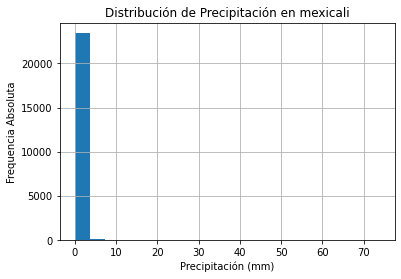

In [ ]:
# Elaboración de Histogramas
# Utilizamos Matplotlib.Pyplot, abreviado como plt 
# NOTA: Usaremos la notación equivalente de columnas, df['Variable'] = df.Variable



#####################################

plt.hist(df_meteo.Precip, bins=20)
# plt.hist(basededatos.columna, ancho de coluna)
#####hist de histogram creo.


#####################################
#En esta parte se ponen las etiquetas 
#etiqueta del eje x
plt.xlabel('Precipitación (mm)')
#etiqueta del eje y
plt.ylabel('Frequencia Absoluta')
#Etiqueta del titulo
plt.title('Distribución de Precipitación en mexicali')


#en esta parte  agregamos extras 
plt.grid() #En esta parte se pone el cuadriculado para poder identicar mejor hasta donde llegan las barras 
plt.show() #la verdad no sé qué hace esto


In [ ]:
# Repetimos la gráfica utilizando escala logarítmica en el Eje y para mejor visualización

plt.(df_meteo.Precip, bins=20)# esta parte está igual que la celda anterior
plt.yscale("log")#aquí elegimos la escala, al parcer pude entender que escala queremos basada en lo que escirbimos dentro de los parentseis
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en Mexicali')

plt.grid()
plt.show()

SyntaxError: ignored

**Histogramas de evaporación**

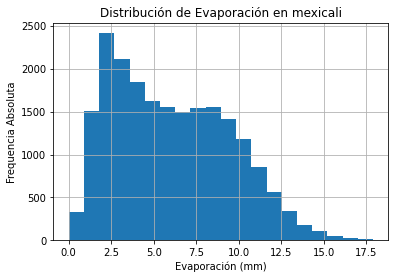

In [ ]:
#evaporación 
####################################

plt.hist(df_meteo.Evap, bins=20)
# plt.hist(basededatos.columna, ancho de coluna)
#####hist de histogram creo.


#####################################
#En esta parte se ponen las etiquetas 
#etiqueta del eje x
plt.xlabel('Evaporación (mm)')
#etiqueta del eje y
plt.ylabel('Frequencia Absoluta')
#Etiqueta del titulo
plt.title('Distribución de Evaporación en mexicali')


#en esta parte  agregamos extras 
plt.grid() #En esta parte se pone el cuadriculado para poder identicar mejor hasta donde llegan las barras 
plt.show() #la verdad no sé qué hace esto

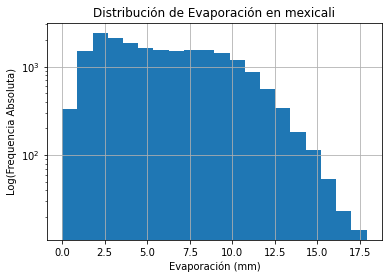

In [ ]:
#evaporación 
####################################

plt.hist(df_meteo.Evap, bins=20)
# plt.hist(basededatos.columna, ancho de coluna)
#####hist de histogram creo.
#Escala logaridmica
plt.yscale("log")#aquí elegimos la escala, al parcer pude entender que escala queremos basada en lo que escirbimos dentro de los parentseis


#####################################
#En esta parte se ponen las etiquetas 
#etiqueta del eje x
plt.xlabel('Evaporación (mm)')
#etiqueta del eje y
plt.ylabel('Log(Frequencia Absoluta)')
#Etiqueta del titulo
plt.title('Distribución de Evaporación en mexicali')


#en esta parte  agregamos extras 
plt.grid() #En esta parte se pone el cuadriculado para poder identicar mejor hasta donde llegan las barras 
plt.show() #la verdad no sé qué hace esto

**Histograma de temperatura maxima**

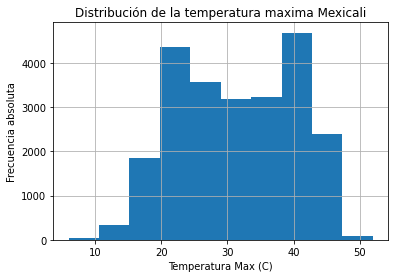

In [ ]:
#Temperatura maxiama 
#############################################
plt.hist(df_meteo.Tmax, bins=10)
#############################################
#poner etiquetas 
plt.xlabel("Temperatura Max (C)")
plt.ylabel("Frecuencia absoluta")
plt.title("Distribución de la temperatura maxima Mexicali")
#en esta parte  agregamos extras 
#Extras
plt.grid(20) #En esta parte se pone el cuadriculado para poder identicar mejor hasta donde llegan las barras 
plt.show(10) #la verdad no sé qué hace esto

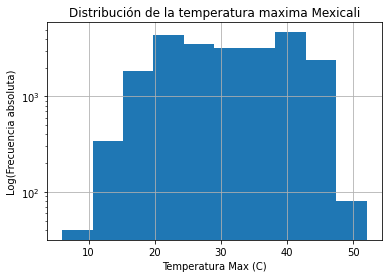

In [ ]:
#Temperatura maxiama 
#############################################
plt.hist(df_meteo.Tmax, bins=10)
#############################################
#Poner escala logaridmica
plt.yscale("log")
#############################################
#poner etiquetas 
plt.xlabel("Temperatura Max (C)")
plt.ylabel("Log(Frecuencia absoluta)")
plt.title("Distribución de la temperatura maxima Mexicali")
#en esta parte  agregamos extras 
#Extras
plt.grid(20) #En esta parte se pone el cuadriculado para poder identicar mejor hasta donde llegan las barras 
plt.show(10) #la verdad no sé qué hace esto

**Histograma de temperatura minima**

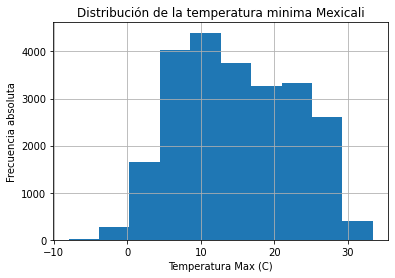

In [ ]:
#Temperatura Minima 
#############################################
plt.hist(df_meteo.Tmin, bins=10)
#############################################
#poner etiquetas 
plt.xlabel("Temperatura Max (C)")
plt.ylabel("Frecuencia absoluta")
plt.title("Distribución de la temperatura minima Mexicali")
#en esta parte  agregamos extras 
#Extras
plt.grid() #En esta parte se pone el cuadriculado para poder identicar mejor hasta donde llegan las barras 
plt.show() #la verdad no sé qué hace esto

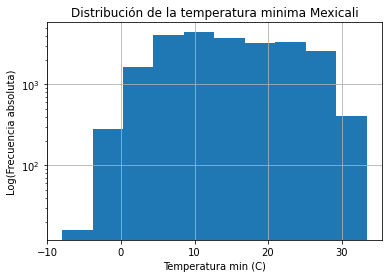

In [ ]:
#Temperatura minima logarid
#############################################
plt.hist(df_meteo.Tmin, bins=10)
#############################################
#Poner escala logaridmica
plt.yscale("log")
#############################################
#poner etiquetas 
plt.xlabel("Temperatura min (C)")
plt.ylabel("Log(Frecuencia absoluta)")
plt.title("Distribución de la temperatura minima Mexicali")
#en esta parte  agregamos extras 
#Extras
plt.grid(20) #En esta parte se pone el cuadriculado para poder identicar mejor hasta donde llegan las barras 
plt.show(10) #la verdad no sé qué hace esto

Act 3

---
# **Graficas de caja**

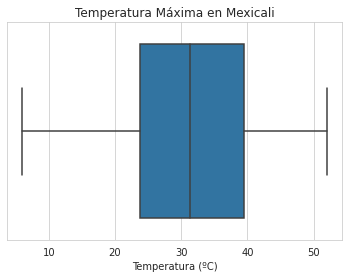

In [ ]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmax, data=df_meteo, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Máxima en Mexicali');

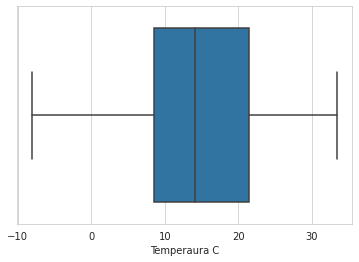

In [ ]:
#Temperaturma minima
#grafica de cajas (boxplots) usando seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmin, data=df_meteo, orient="h").set(xlabel="Temperaura C")
title="Temperatura minima mexicali"


**Actividad 4**


---
 Produzca las gráficas de barras para la Precipitación agrupado por Años y después por meses (Función: sns.barplot())


In [ ]:
#Estos son data frame 
# Seleccionaremos un conjunto de años de 30 años  
df_30 = df_meteo[(df_meteo['Año'] >= 1930) & (df_meteo['Año'] < 1960)]
df_60 = df_meteo[(df_meteo['Año'] >= 1960) & (df_meteo['Año'] < 1990)]
df_90 = df_meteo[(df_meteo['Año'] >= 1990) & (df_meteo['Año'] < 2018)]

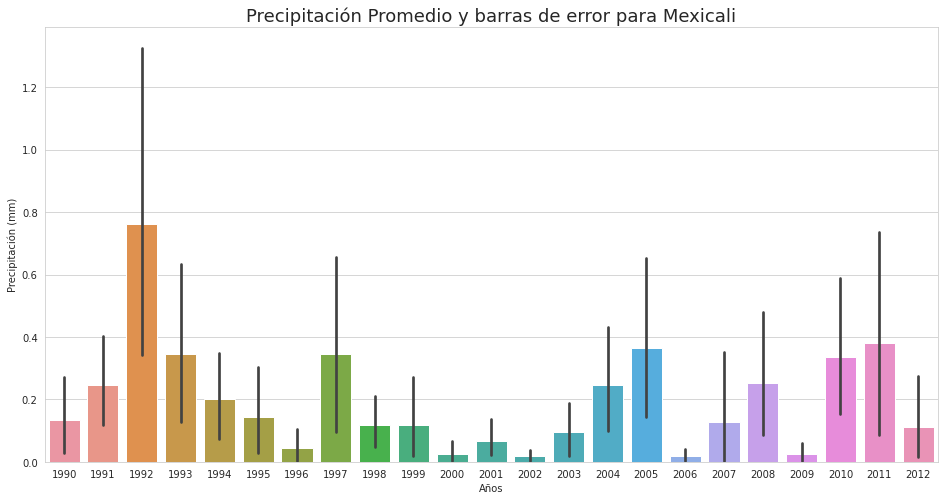

In [ ]:
# Gráfica de Precipitación últimos 30 años
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Mexicali', fontsize=18)

plt.show()

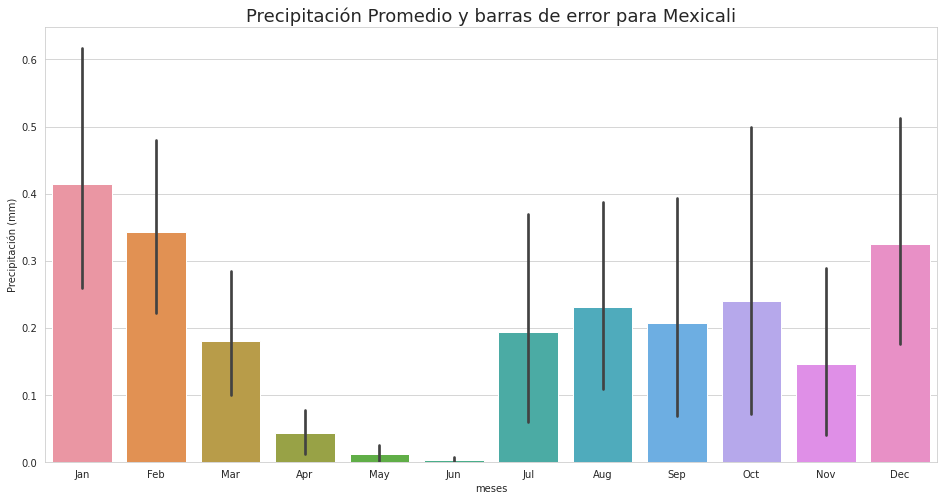

In [ ]:
# Gráfica de Precipitación últimos 30 años
# Agrupada por mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_90);
# volvemos a tomar los 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Mexicali', fontsize=18)

plt.show()

**Actividad 5.**


---

Por favor cree una colección de los últimos 30 años de datos, utilizando condiciones de filtrado por un rango de años. Crear las gráficas de línea de la Precipitación, Temperaturas Máxima y Mínima como funciones del tiempo (Últimos 30 Años). (Función: sns.lineplot())

 






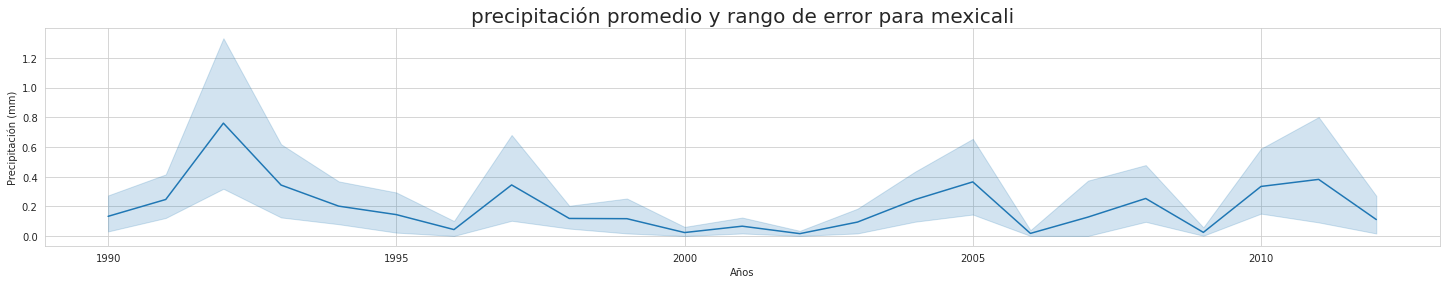

In [ ]:
#Precipitaciones de los ultimos 30 años

sns.set_style("whitegrid")#elegir el tipo de grafica
plt.figure(figsize=(25,4))#tamaño de cuadro

#crear la variable g
g=sns.lineplot(x="Año", y="Precip", data=df_90);
#Se colocan las variables  segun su eje y se elige el data frame

#le damos nombre a los ejes 
plt.xlabel("Años")
plt.ylabel("Precipitación (mm)")
plt.title("precipitación promedio y rango de error para mexicali", fontsize=20)

plt.show()



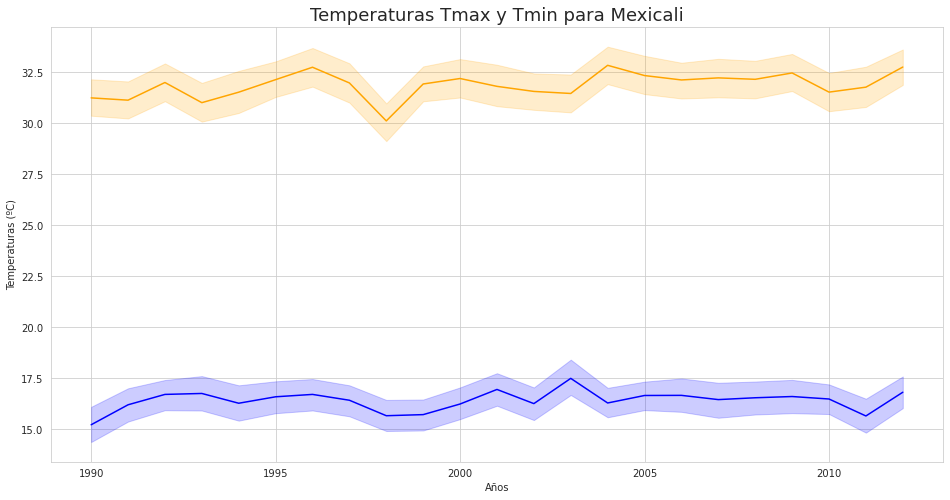

In [ ]:
# Gráfica de Temperaturas de últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

#impresión de lineas 
sns.lineplot(x='Año', y='Tmax', data=df_90, color='orange');
sns.lineplot(x='Año', y='Tmin', data=df_90, color="b");

#Nombre de los ejes
plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Mexicali', fontsize=18)

plt.show()

# **Actividad 6.**

---

Con el conjunto de 30 años de datos, produzca diagramas de cajas (Función: sns.boxplot()) para observar la variabilidad de las Temperaturas (Max y Tmin) y la Evaporación agrupados por Mes.

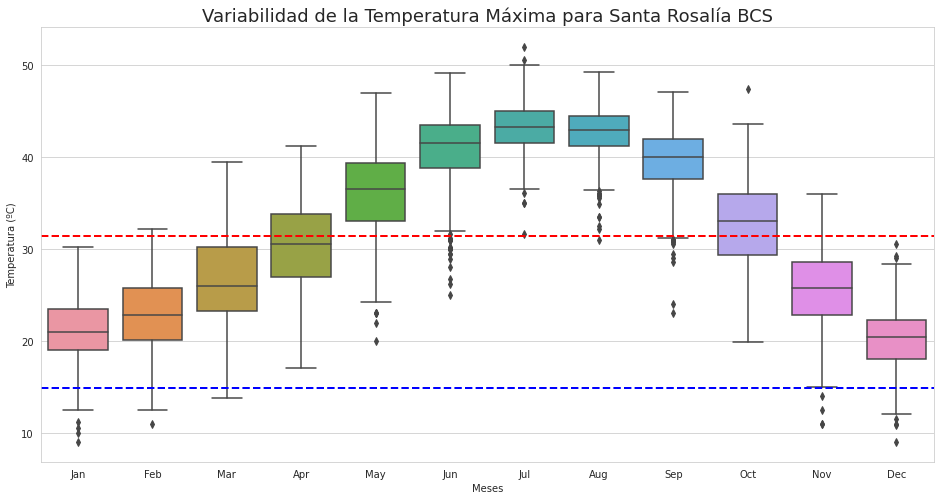

mean(Tmax) =  31.360505475989886
mean(Tmin) =  14.885347769304943
Diff Tmax_ave-Tmin_ave =  16.475157706684943


In [ ]:
# Gráfica de Temepraturas Máximas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=df_90);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Mexicali', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

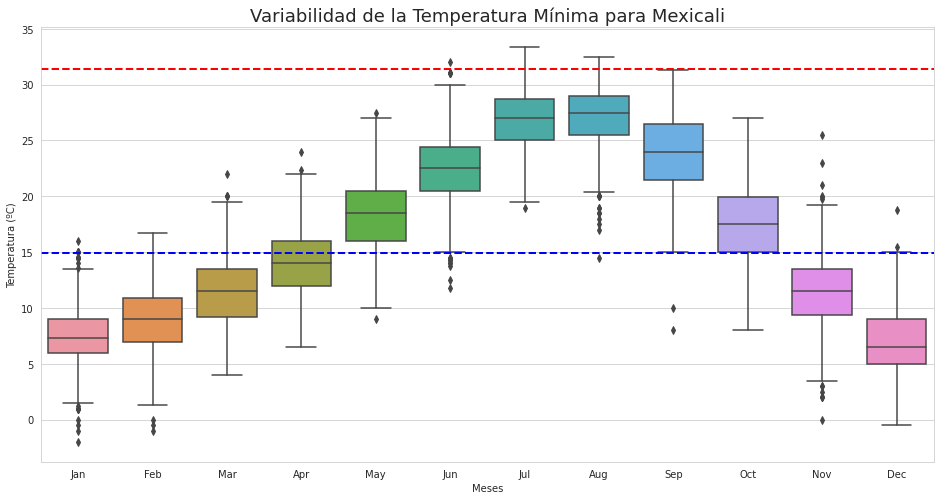

mean(Tmax) =  31.360505475989886
mean(Tmin) =  14.885347769304943
Diff Tmax_ave-Tmin_ave =  16.475157706684943


In [ ]:
# Gráfica de Temperaturas Mínimas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin', data=df_90);
# Linea de Tmin promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Mexicali', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

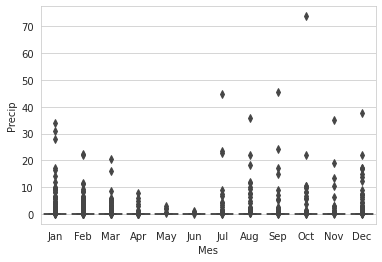

In [ ]:
# La gráfica de Boxplot no brinda información de la Precipitación por mes
sns.boxplot(x='Mes' , y='Precip', data=df_90)